## Namespaces

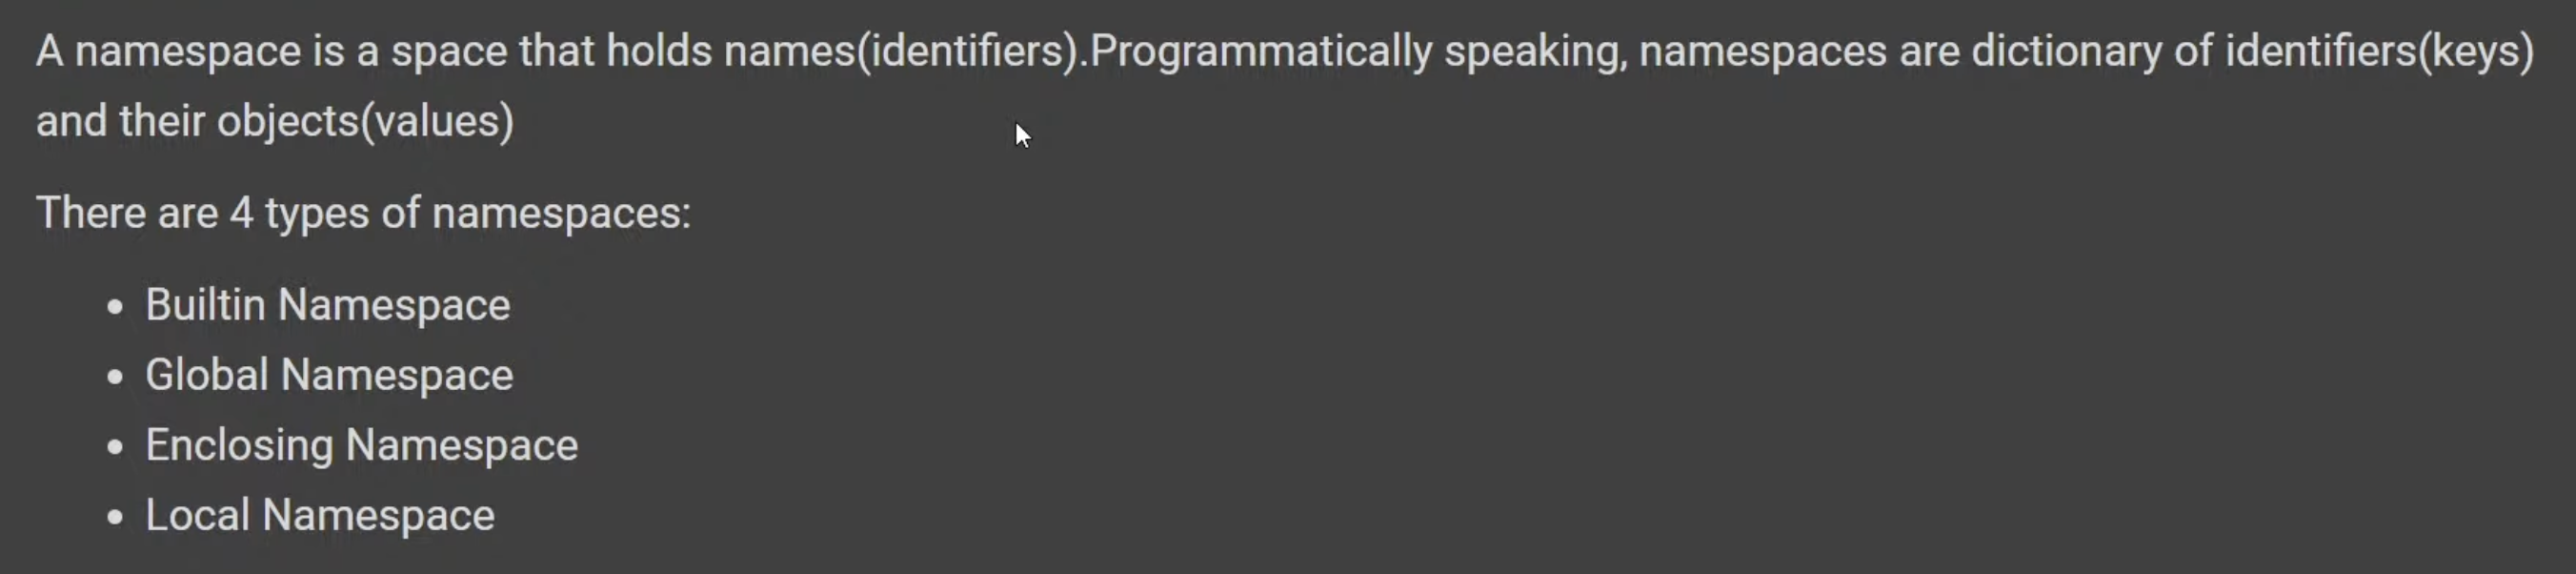

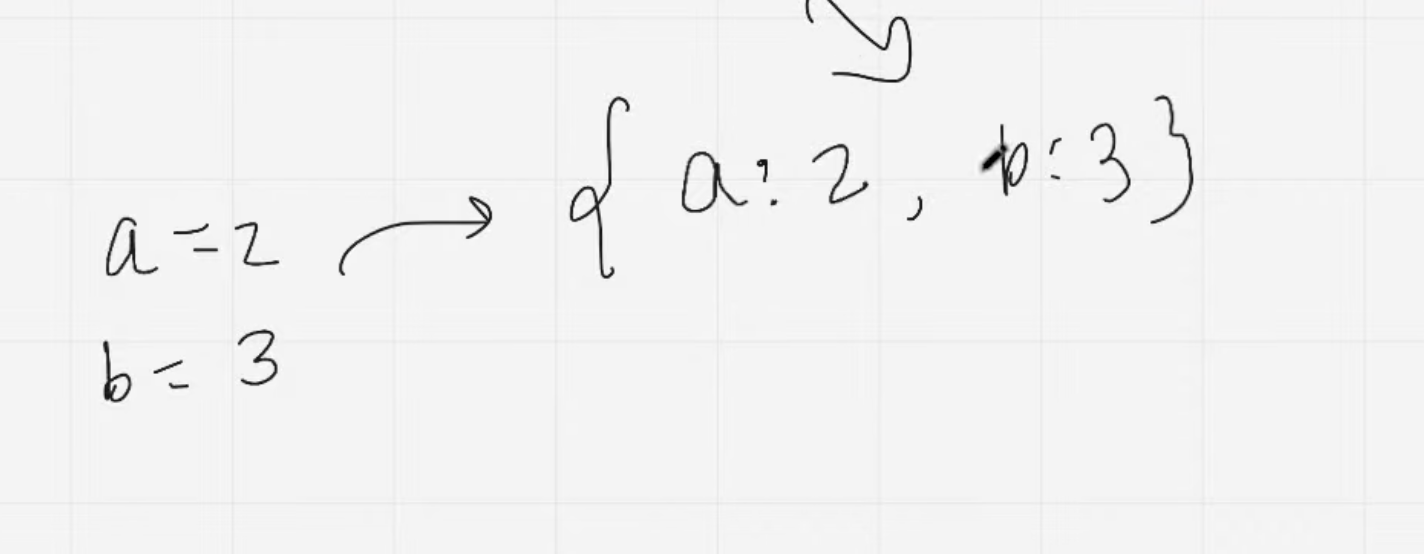



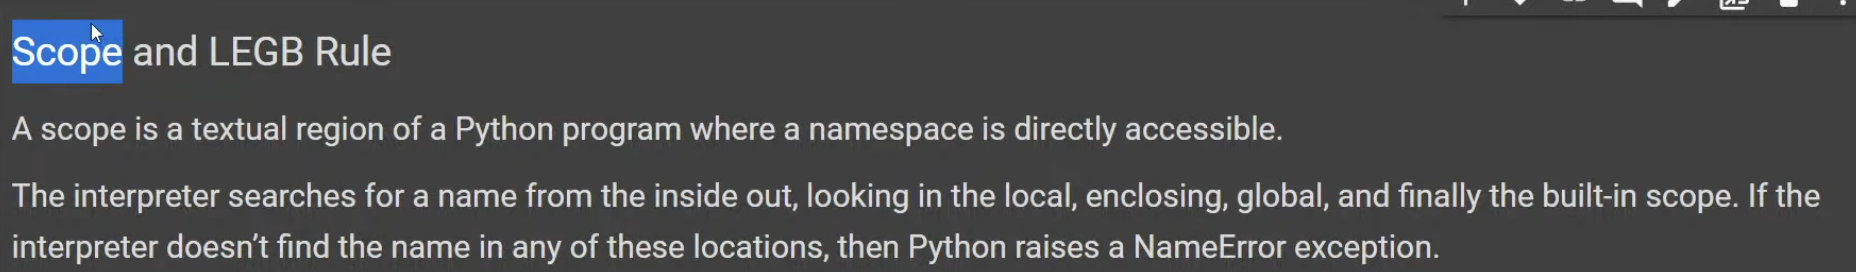

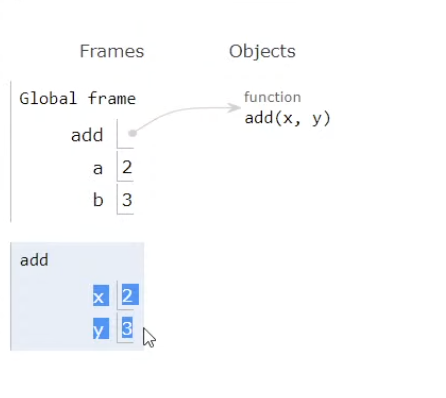

the boxes are scope and the x and y and their values is namespace

In [ ]:
## scope ek aisa area hota jaha variable accessible hota hai 

## LEGB= LOCAL ENCLOSING GLOBAL BUILT-IN 



In [ ]:
## local and global

a=2

def temp():
    b=3
    print(b)

temp()
print(a)
## a is global variable and b is local variable 

3
2


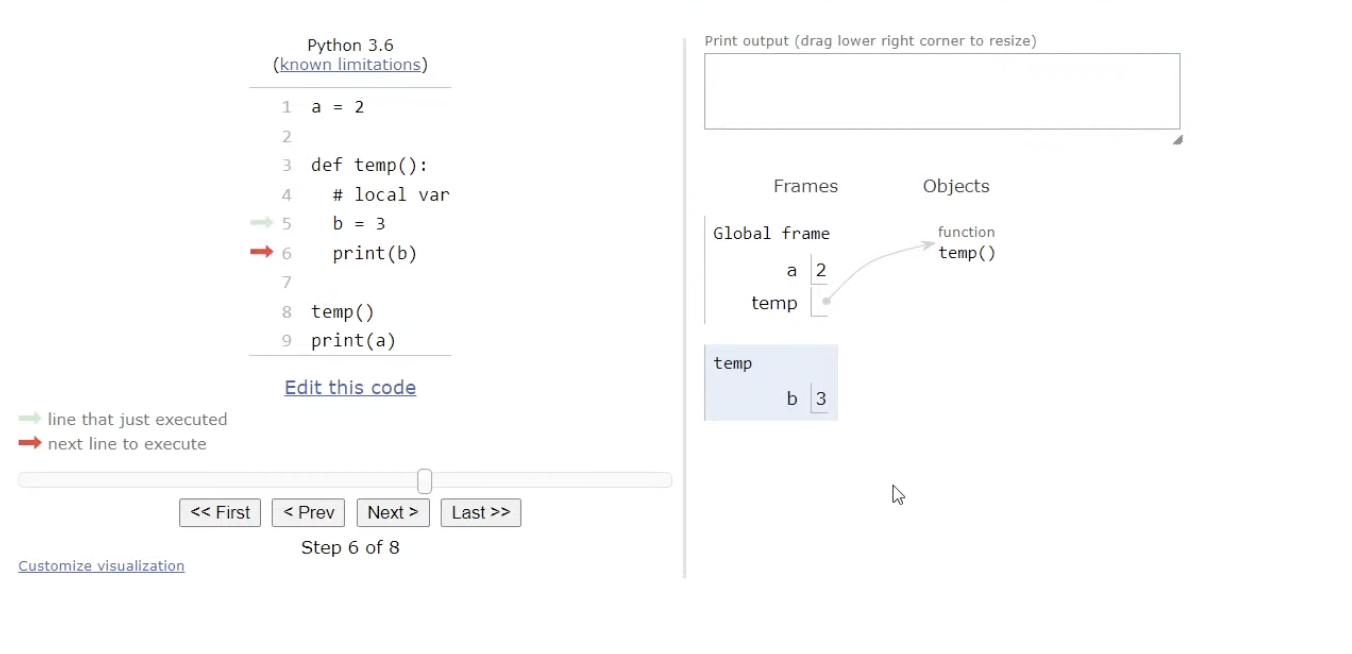

In [4]:
## local and global -> same name 

## local and global

a=2

def temp():
    a=3
    print(a)

temp()
print(a)
## a is global variable and b is local variable 

3
2


In [ ]:
## local and global -> local doesn't have but global has
a=2

def temp():
    print(a)

temp()
print(a)


## if a python interpreter doesn't find local variable then it will take global variable by the same as that of local variable 

## LOCAL ->GLOBAL 

2
2


In [ ]:
## Local and global -> editing global 

a=2

def temp():
    a+=1
    print(a)

temp()
print(a)

## this code will not execute 
## you can access global variables from local scope but cannot make changes on global variables 
## but we can make change by using keyword global 

UnboundLocalError: cannot access local variable 'a' where it is not associated with a value

In [7]:
a=2

def temp():
    global a
    a+=1
    print(a)

temp()
print(a)

3
3


In [ ]:
## global created inside local 
def temp():
    global a
    a=1
    print(a)

temp()
print(a)

1
1


In [ ]:
## function parameter is local 

def temp(z):
    print(z)

a=5
temp(5)
print(a)
## z is local variable

5
5


In [12]:
##built-in scope

## to use print function we didn't import anything and nor we created print function
## print is example of builtin scope

import builtins
print(dir(builtins))

## global se upper is builtin 

['ArithmeticError', 'AssertionError', 'AttributeError', 'BaseException', 'BaseExceptionGroup', 'BlockingIOError', 'BrokenPipeError', 'BufferError', 'BytesWarning', 'ChildProcessError', 'ConnectionAbortedError', 'ConnectionError', 'ConnectionRefusedError', 'ConnectionResetError', 'DeprecationWarning', 'EOFError', 'Ellipsis', 'EncodingWarning', 'EnvironmentError', 'Exception', 'ExceptionGroup', 'False', 'FileExistsError', 'FileNotFoundError', 'FloatingPointError', 'FutureWarning', 'GeneratorExit', 'IOError', 'ImportError', 'ImportWarning', 'IndentationError', 'IndexError', 'InterruptedError', 'IsADirectoryError', 'KeyError', 'KeyboardInterrupt', 'LookupError', 'MemoryError', 'ModuleNotFoundError', 'NameError', 'None', 'NotADirectoryError', 'NotImplemented', 'NotImplementedError', 'OSError', 'OverflowError', 'PendingDeprecationWarning', 'PermissionError', 'ProcessLookupError', 'PythonFinalizationError', 'RecursionError', 'ReferenceError', 'ResourceWarning', 'RuntimeError', 'RuntimeWarning

In [14]:
## renaming built-ins 

L=[1,2,3]
max(L)

3

In [17]:
## enclosing scope
L=[1,2,3]

def max():
    print('hello')

max(L)

## LEGB LOCAL->ENCLOSED->GLOBAL YOU FOUND THE FUNCTION IN GLOBAL AND YOU
## DON't GO TO BUILTIN SO IT GIVES ERROR 

## IF YOU FIND MAX IN GLOBAL THEN YOU DON'T IMPLEMENT LOGIC OF MAX OF BUILTIN


TypeError: max() takes 0 positional arguments but 1 was given

In [1]:
## enclosing scope 
## we find it inside nested functions (function inside function)

def outer():
    def inner():
        print('inner function')
    inner()
    print('outer function')

outer()
print('main program')

inner function
outer function
main program


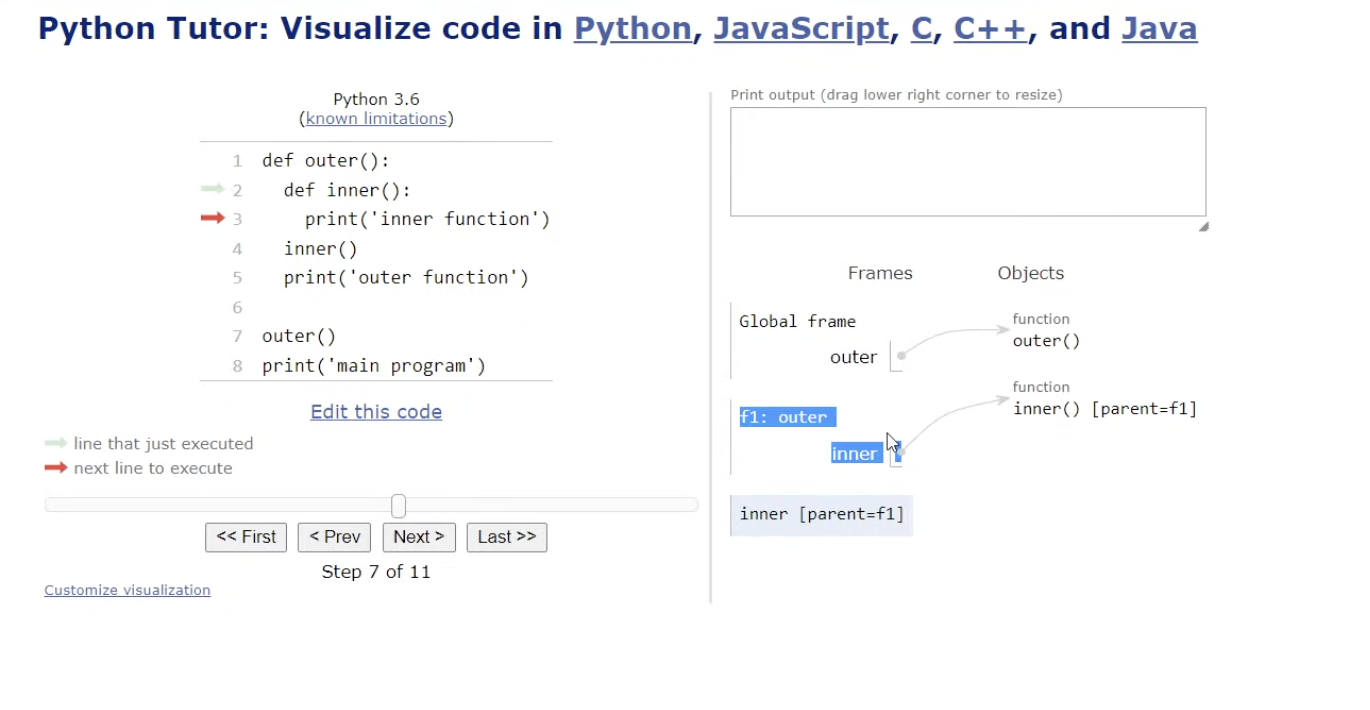

this shaded is enclosed 

In [4]:
## enclosing scope 

def outer():
    a=3
    def inner():
        print(a)
    inner()
    print('outer function')

a=1
## for inner function outer is enclosed scope  (outer function ka scope)
outer()
print('main program')

3
outer function
main program


In [9]:
## inner function se outer function ke variables you change



def outer():
    a=1
    def inner():
        nonlocal a ## just like global keyword 
        a+=1
        print('inner',a)
    inner()
    print('outer',a)

a=1
## for inner function outer is enclosed scope  (outer function ka scope)
outer()
print('main program')
print(a)

inner 2
outer 2
main program
1


## Decorators


A decorator in python is a function that takes another function as input and adds some functionality(decoration) to it and returns it.

This can happen because python functions are 1st class citizens.
1st class citizens are those objects in python on which you can do any operations: store them,delete them,given as inputs,rename them,return them 

There are 2 types of decorators in python:

1-Builtin decorators like @staticmethod,@classmethod,@abstractmethod and @property etc

2-User defined decorators that we programmers can create according to our needs

In [13]:
def func():
    print('hello')

a=func ## a can be used as a function 
a()

## func is store in a

del func
func()

hello


NameError: name 'func' is not defined

In [ ]:


def modify(func,num):
    return func(num)

def square(num):
    return num**2

modify(square,2)



4

In [23]:
## simple example 1

def my_decorator(func):
    def wrapper():
        print('*'*10)
        func()
        print('*'*10)
    return wrapper

def hello():
    print('hello')

def display():
    print('hello nitish')
a=my_decorator(hello)
a()

b=my_decorator(display)
b()


**********
hello
**********
**********
hello nitish
**********


In [26]:
## even though func work is already done it is still in memory and wrapper function can still access to func fn 
## it is called closure property

## inner function parent fn ke marne ke baad bhi uski cheezo ko access kar saktha hai memory se 

In [24]:
def outer():
    a=5
    def inner():
        print(a)
    return inner
b=outer()
b()

5


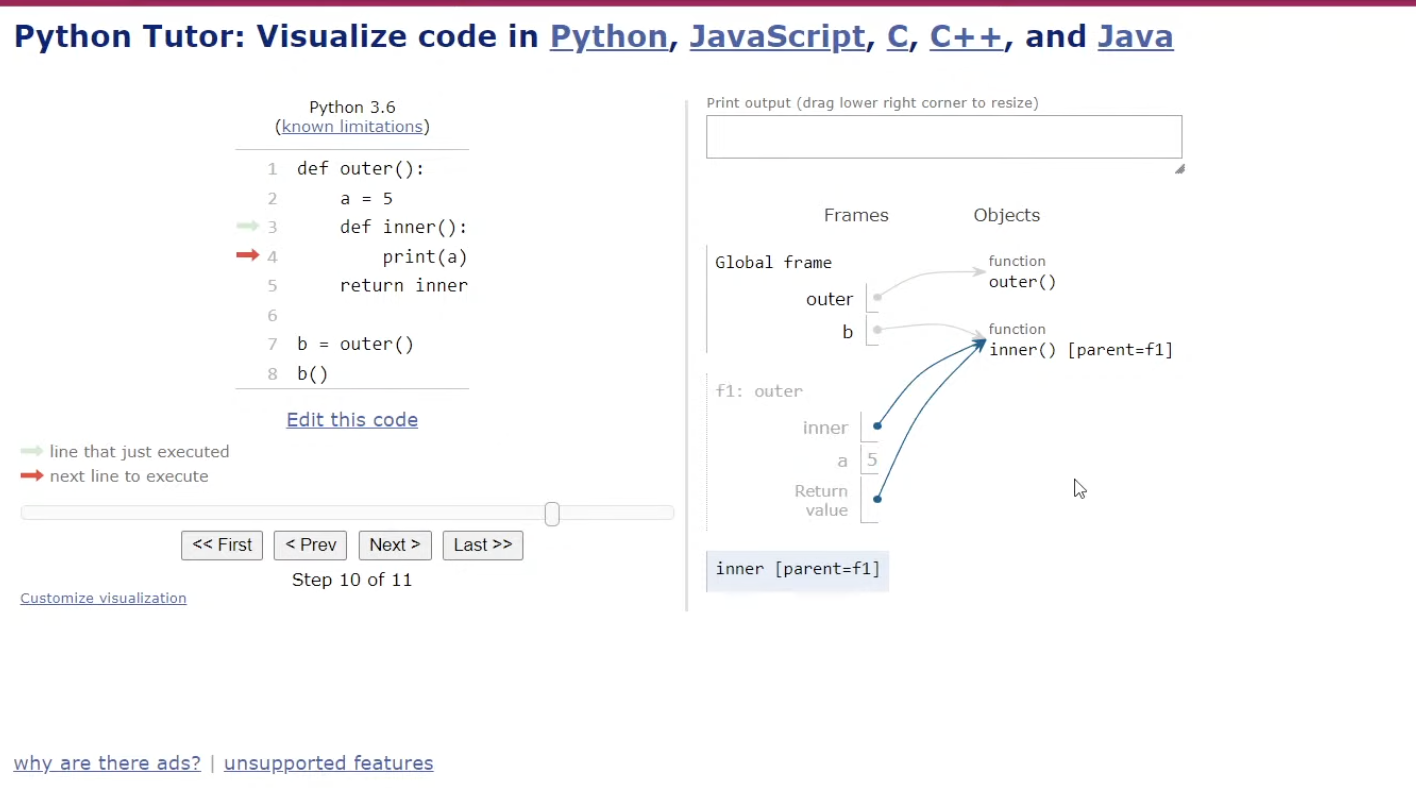

In [27]:

def my_decorator(func):
    def wrapper():
        print('*'*10)
        func()
        print('*'*10)
    return wrapper

def hello():
    print('hello')

a=my_decorator(hello)
a()

## is there any better synatx ???? 


**********
hello
**********


In [28]:
def my_decorator(func):
    def wrapper():
        print('*'*10)
        func()
        print('*'*10)
    return wrapper
@my_decorator
def hello():
    print('hello')

hello()

**********
hello
**********


In [30]:
## meaningful decorator: a decorator which can print execution time of any function

import time

def timer(func):
    def wrapper():
        start=time.time()
        func()
        print('time taken by',func.__name__,time.time()-start,'secs')
    return wrapper
@timer
def hello():
    print('hello world')
    time.sleep(2)
@timer
def display():
    print('displaying sleep')
    time.sleep(4)
hello()

display()

hello world
time taken by hello 2.0051097869873047 secs
displaying sleep
time taken by display 4.00506591796875 secs


In [ ]:
## meaningful decorator: a decorator which can print execution time of any function

import time

def timer(func):
    def wrapper():
        start=time.time()
        func() ## when you execute square we are not it input but square needs an input to work 
        ## this func will only work on those functions who don't need any input 
        print('time taken by',func.__name__,time.time()-start,'secs')
    return wrapper
@timer
def hello():
    print('hello world')
    time.sleep(2)

@timer
def square(num):
    return num**2
    
hello()
square(2)

## error in code is there 

## how to make it generic ? use *args

hello world
time taken by hello 2.002919912338257 secs


TypeError: timer.<locals>.wrapper() takes 0 positional arguments but 1 was given

In [33]:
def timer(func):
    def wrapper(*args):
        start=time.time()
        func(*args)
        print('time taken by',func.__name__,time.time()-start,'secs')
    return wrapper


@timer
def hello():
    print('hello babes')
    time.sleep(2)

@timer 
def square(num):
    return num**2

@timer
def power(a,b):
    return a**b
square(2)
power(4,4)

time taken by square 1.9073486328125e-06 secs
time taken by power 2.1457672119140625e-06 secs


In [42]:
## a big problem: decorator checks whether an input in a given function is valid or not 

def sanity_check(data_type):
    def outer_wrapper(func):
        def inner_wrapper(*args):
            if type(args[0])==data_type:
                func(*args)
            else:
                raise TypeError('ye datatyp nahi chalega ')
        return inner_wrapper
    return outer_wrapper

@sanity_check(int)
def square(num):
    print(num**2)


@sanity_check(str)
def greet(name):
    print('hello',name)
square(2)

greet('name')

4
hello name


In [5]:
## function copy

def welcome():
    return "welcome to the advanced python course"

welcome()

'welcome to the advanced python course'

In [2]:
wel=welcome
wel()

'welcome to the advanced python course'

In [6]:
print(wel())
del welcome
print(wel())
## able to use the function 

welcome to the advanced python course
welcome to the advanced python course


In [11]:
## closure -> function inside function

def main_welcome():
    msg="Welcome"
    def sub_welcome(): ## closure function
        print("Welcome to adv python course")

    return sub_welcome()

main_welcome()

Welcome to adv python course
